Refining the dataset with the folder that has atleast 2 or more images and creating hte  refined dataset and corresponding csv file for it.

 1. Loads the refined muzzle feature dataset
 2. Splits the data into training and testing sets
 3. Applies feature scaling
 4. Uses GridSearchCV to find the best KNN parameters

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ==============================
# 1️⃣ Load Dataset
# ==============================
csv_path = r"D:\Abhishek\muzzle_features_refined.csv"  # <-- Update this path
df = pd.read_csv(csv_path)

print("✅ Dataset Loaded Successfully")
print("Total Samples:", len(df))
print("Unique Cattle IDs:", df['cattle_id'].nunique())

# ==============================
# 2️⃣ Prepare Features and Labels
# ==============================
X = df[['num_blobs', 'mean_intensity', 'std_intensity']].astype(float).values
y = df['cattle_id'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Training Samples:", len(X_train))
print("Testing Samples:", len(X_test))

# ==============================
# 3️⃣ Build Pipeline and Optimize KNN
# ==============================
pipeline = Pipeline([
    ('scaler', StandardScaler()),   
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

knn_pipeline = grid_search.best_estimator_

print("✅ KNN Model Optimized and Trained Successfully!")
print("Best Parameters Found:", grid_search.best_params_)


✅ Dataset Loaded Successfully
Total Samples: 2692
Unique Cattle IDs: 400
Training Samples: 2153
Testing Samples: 539


d:\Abhishek\venv\lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


✅ KNN Model Optimized and Trained Successfully!
Best Parameters Found: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}


In [13]:
# 📌 Cell Description:
# This cell contains supporting code for data processing or model training.
import joblib

joblib.dump(knn_pipeline, "knn_cattle_model.pkl")
print("✅ Model saved successfully!")

✅ Model saved successfully!


d:\Abhishek\venv\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Abhishek\venv\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Abhishek\venv\lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)


✅ Accuracy: 1.48%


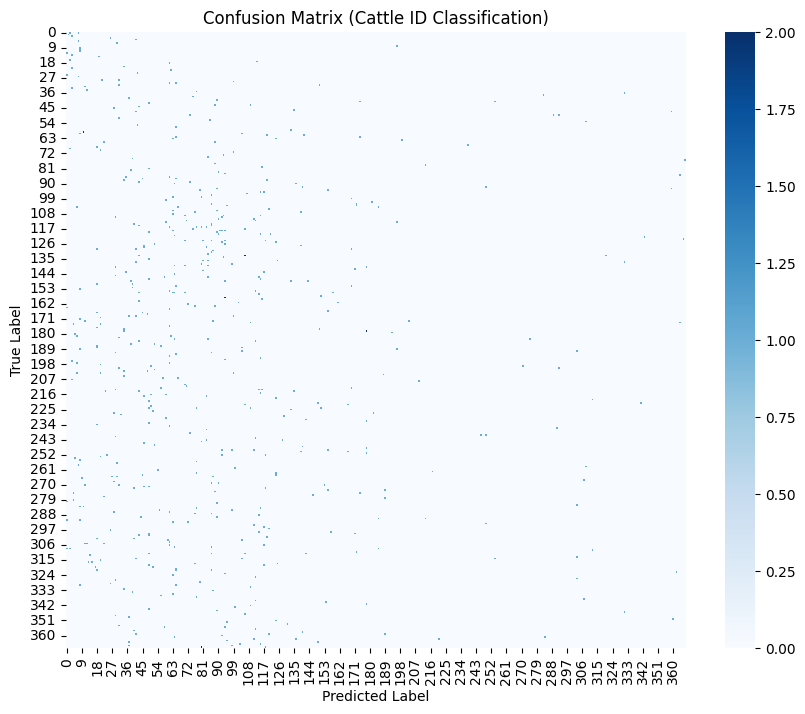


📊 Classification Report:
              precision    recall  f1-score   support

  cattle-001       0.00      0.00      0.00         2
  cattle-002       1.00      1.00      1.00         1
  cattle-003       0.00      0.00      0.00         1
  cattle-004       0.00      0.00      0.00         1
  cattle-005       0.00      0.00      0.00         1
  cattle-006       0.00      0.00      0.00         1
  cattle-007       0.00      0.00      0.00         1
  cattle-008       0.00      0.00      0.00         0
  cattle-009       0.00      0.00      0.00         1
  cattle-010       0.00      0.00      0.00         1
  cattle-011       0.00      0.00      0.00         1
  cattle-012       0.00      0.00      0.00         1
  cattle-013       0.00      0.00      0.00         1
  cattle-015       0.00      0.00      0.00         1
  cattle-016       0.00      0.00      0.00         1
  cattle-017       0.00      0.00      0.00         0
  cattle-018       0.00      0.00      0.00         1
 

d:\Abhishek\venv\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Abhishek\venv\lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  ys_types = set(type_of_target(x) for x in ys)
d:\Abhishek\venv\lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
d:\Abhishek\venv\lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the numbe

In [14]:
# 📌 Cell Description:
# This cell evaluates the trained KNN model using accuracy, confusion matrix, and classification report.
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ✅ Assuming you already have:
# - Trained KNN model: knn
# - Test dataset: X_test, y_test

knn = joblib.load("D:\Abhishek\knn_cattle_model.pkl")

# --- Predict on test set ---
y_pred = knn.predict(X_test)

# ✅ 1️⃣ Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy*100:.2f}%")

# ✅ 2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap="Blues", annot=False)
plt.title("Confusion Matrix (Cattle ID Classification)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ✅ 3️⃣ Classification Report
report = classification_report(y_test, y_pred)
print("\n📊 Classification Report:")
print(report)


In [ ]:

import cv2
import numpy as np
from skimage.filters import gabor

def extract_muzzle_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")

    # Apply Gabor filter
    frequency = 0.2
    gabor_res, _ = gabor(img, frequency=frequency)
    gabor_img = (gabor_res * 255).astype(np.uint8)

    # --- Feature 1: Blob Detection ---
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 5
    params.maxArea = 300
    params.filterByCircularity = False
    params.filterByConvexity = False
    params.filterByInertia = False

    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(gabor_img)
    blob_count = len(keypoints)

    # --- Feature 2 & 3: Gabor Stats ---
    gabor_mean = np.mean(gabor_res)
    gabor_std = np.std(gabor_res)

    # Return features in same format as training CSV
    return np.array([blob_count, gabor_mean, gabor_std])


In [ ]:

import joblib

# Load your saved KNN pipeline
knn = joblib.load(r"D:\Abhishek\knn_cattle_model.pkl")

# Load a test image
test_image_path = r"D:\Abhishek\base_256\cattle-209\IMG_20230319_074342-02.jpg"  # Update path
new_feature = extract_muzzle_features(test_image_path).reshape(1, -1)

# Predict ID
predicted_id = knn.predict(new_feature)[0]

# Get nearest neighbor distances
knn_model = knn.named_steps['knn']  # access classifier from pipeline
distances, indices = knn_model.kneighbors(new_feature, n_neighbors=3)
confidence_score = 1 / (1 + np.mean(distances))

print(f"✅ Predicted Cattle ID: {predicted_id}")
print(f"🔹 Verification Confidence: {confidence_score:.4f}")


✅ Predicted Cattle ID: cattle-080
🔹 Verification Confidence: 0.0067


# Conclusion

KNN struggles heavily in this scenario because:

- It relies on having enough nearby neighbors of the same class.

- With only 2–3 samples per class, the likelihood of a correct "vote" is very low.

- Your confusion matrix is mostly empty, meaning the classifier is mostly guessing.

This is why you observed much better similarity results using cosine distance manually:

- Cosine similarity directly compares feature vectors instead of "voting neighbors.

- KNN can't generalize well with this many classes and little data.

